In [1]:
# Testing configuration of upper interface of SAMs with different OH- headgroups percentages
# (polarities). The surface is configured as a grid of atoms (C and O)
import numpy as np
import math
import matplotlib.pyplot as plt
import sys

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
########################### SET PARAMETERS FOR THE SIZE ###############################
xcopies = 1
ycopies = 1

Nx = 10 # number of gridpoints in x-direction (carbons)
Ny = 10 # number of gridpoints in y-direction (carbons)

Nx = Nx*xcopies # number of gridpoints in x-direction (carbons)
Ny = Ny*ycopies # number of gridpoints in y-direction (carbons)

a0 = 5.0 #

In [3]:
########################### FUNCTION SET ALL PARTICLE TYPES TO 'C' ###############################

def C_restart(Nx,Ny):
    pType = np.zeros([Nx,Ny],dtype=str) # particle type

    # set standard particle type as Carbon
    for i in range(Nx):
        for j in range(Ny):
            pType[i,j] = 'C'
    return pType

In [4]:
########################### FUNCTION TO CREATE GRID ###########################
def creategrid(a0):
    # set particle x- and y- coordinates
    # !!!! later move to create_top_surface.ipynb !!!


    # First basis vector V = (Vx,Vy)
    Vx = a0
    Vy = 0
    # Second basis vector W = (Wx,Wy) 
    Wx = a0*np.sin(np.pi/6)
    Wy = a0*np.cos(np.pi/6)

    # create arrays that hold particle positions
    xPos = np.zeros([Nx,Ny],dtype=float) # x positions of particles
    yPos = np.zeros([Nx,Ny],dtype=float) # y positions of particles
    zlastPos = np.zeros([Nx,Ny],dtype=float) # zlastPos ONLY will serve to calculate the box height (z)
    
    ########################### TYPE 1 OF GRID #############################################

    for j in range(Ny):
        for i in range(Nx):
            xPos[i,j] = i*Vx + j*Wx
            yPos[i,j] = i*Vy + j*Wy 
            
    for j in range(1,Ny):
        for i in range(Nx):  # Here we move the last particles of almost each line to get a more rectangular surface shape
            if xPos[i,j]>xPos[-1,1]:
                xPos[i,j] = xPos[i-Nx+1,j-2]

    return xPos, yPos, zlastPos

In [5]:
################################## FUNCTION TO PLOT GRID  ######################################
def plotgrid(pType, a0):
    
    xPos, yPos, zlastPos = creategrid(a0)
    
    SizeOfDots = 8
    fig, ax = plt.subplots()
    for i in range(Nx):
        for j in range(Ny):
            if pType[i,j] == 'O':
                ax.plot([xPos[i,j]],[yPos[i,j]],marker='o',markersize=SizeOfDots,color='blue')
            else:
                ax.plot([xPos[i,j]],[yPos[i,j]],marker='o',markersize=SizeOfDots,color='green')
    text = '%, Grid '+ str(Nx)+'x'+str(Ny)    
    pc = float(n_oxys)/float(Nx*Ny)
    plt.title("Percentage = " + str(int(pc*100))+text, fontsize= 14)
    plt.grid()
    plt.show()
    #fig.savefig('output_' + str(Percentage) + '_positions.pdf',format='pdf')

In [6]:
################################## FUNCTION TO PLOT HEAT MAP  ######################################
def plotheat(pType):
    # HEATMAP
    #   create array with 0s where there is O
    #   and ones where there is C:
    Z = np.zeros([Nx,Ny],dtype=int)
    for i in range(Nx):
        for j in range(Ny):
            if pType[i,j] == 'C':
                Z[i,j] = 1
    
    # plot the heatmap
    fig, ax = plt.subplots()
    ax.imshow(Z, cmap=plt.cm.winter, interpolation='nearest')
    #fig.savefig('output_' + str(Percentage) + '_heatmap.pdf',format='pdf')

In [7]:
########################### EXCHANGE CARBONS WITH OXYGENS #############################

In [10]:
########################### TYPE 1 OF LOOP #############################################

pc = 8 # Good!
xinterval = 3
yinterval = 3

pc = 21
xinterval = 2
yinterval = 1
    
pc=  13
xinterval = 2
yinterval = 2

pc = 35 #(not evenly distributed)
xinterval = 1
yinterval = 2

pc = 14 #(not evenly distributed)
xinterval = 3
yinterval = 1

pc = 50
xinterval = 1
yinterval = 1

pc = 10 #(not evenly distributed)
xinterval = 3
yinterval = 2

pType = C_restart(Nx,Ny)
n_oxys = 0
for k in range(0,Nx,yinterval*2):
    for l in range(0,Ny,xinterval*2):
        pType[k,l] = 'O' 
        n_oxys = n_oxys + 1
for k in range(yinterval,Nx,xinterval*2):
    for l in range(xinterval,Ny,xinterval*2):
        pType[k,l] = 'O' 
        n_oxys = n_oxys + 1

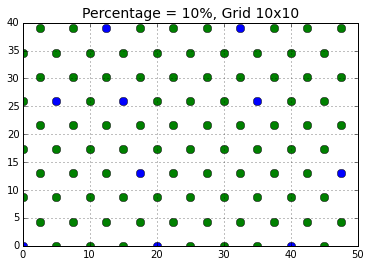

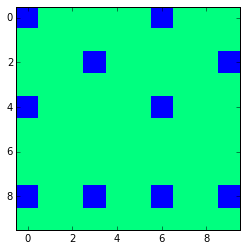

In [11]:
plotgrid(pType, a0)
plotheat(pType)

In [98]:
########################### TYPE 2 OF LOOP #############################################
        
pc = 12 #(not evenly distributed)
xinterval = 4
yinterval = 4

pc = 15 #(not evenly distributed)
xinterval = 3
yinterval = 4

pc = 25 #(not evenly distributed)
xinterval = 3
yinterval = 2

pc = 20 #Good!
xinterval = 3
yinterval = 3

pType = C_restart(Nx,Ny)
n_oxys = 0
for l in range(0,Ny,yinterval):
    for k in range(0,Nx,xinterval-1):
        pType[k,l] = 'O' 
        n_oxys = n_oxys + 1

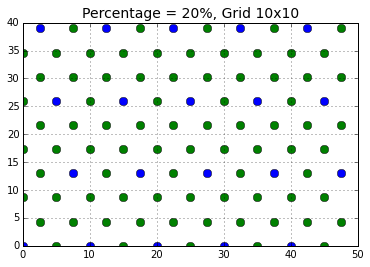

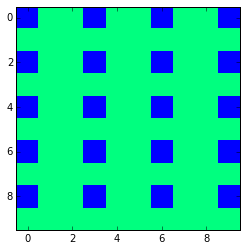

In [99]:
plotgrid(pType, a0)
plotheat(pType)

In [100]:
########################### TYPE 3 OF LOOP (NEW) #######################################

pc = 20 # Good!
xinterval = 2
yinterval = 2

pc = 15 # not evenly distributed
xinterval = 4
yinterval = 2

pc = 16 # not evenly distributed
xinterval = 3
yinterval = 3

pc = 20 # not evenly distributed
xinterval = 3
yinterval = 2

pc = 30 # not evenly distributed
xinterval = 4
yinterval = 1

pc = 40 # not evenly distributed
xinterval = 3
yinterval = 1

pc = 20 #Good!
xinterval = 2
yinterval = 3

# exchange Carbons with oxygens
pType = C_restart(Nx,Ny)
n_oxys =0
for l in range(0,Ny,yinterval):
    for k in range(0,Nx,xinterval):
        pType[k,l] = 'O' 
        n_oxys = n_oxys +1

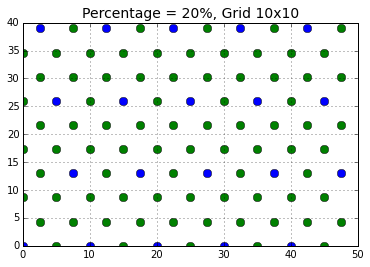

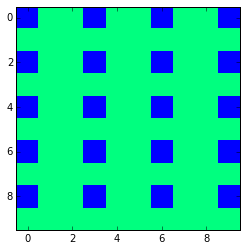

In [101]:
plotgrid(pType, a0)
plotheat(pType)

In [105]:
########################### TYPE 2 OF GRID (to include in function creategrid) ################################

# set particle x- and y- coordinates
counter = 0
for j in range(Ny):
    x_shift = j - counter
    for i in range(Nx):
        xPos[i,j] = (i- x_shift)*Vx + j*Wx
        yPos[i,j] = i*Vy + j*Wy
    if (j%2):
        counter = counter + 1

NameError: name 'Vx' is not defined

In [106]:
print Nx*Ny
print n_oxys
pc = float(n_oxys)/float(Nx*Ny)
print pc 

20 100
20
0.2
